In [ ]:
# !pip install polars

# Import th∆∞ vi·ªán + Load data

In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def read_parquet_by_type(train_path: str):
    # L·∫•y t·∫•t c·∫£ c√°c file parquet trong th∆∞ m·ª•c
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Ph√¢n lo·∫°i c√°c file theo lo·∫°i t√™n
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # ƒê·ªçc c√°c file ri√™ng bi·ªát th√†nh DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Tr·∫£ v·ªÅ m·ªôt dictionary ch·ª©a c√°c DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

In [3]:
data = read_parquet_by_type("C:/Users/tncn2/Downloads/recommendation dataset")

history_df = data["purchase_history_chunk"]
# user_df = data["user_chunk"]
# item_df = data["item_chunk"]

In [4]:
print("History DataFrame:")
history_df 

History DataFrame:


shape: (35_729_825, 16)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ timestamp  ‚îÜ user_id   ‚îÜ item_id   ‚îÜ event_typ ‚îÜ ‚Ä¶ ‚îÜ payment  ‚îÜ location ‚îÜ discount  ‚îÜ is_delete ‚îÇ
‚îÇ ---        ‚îÜ ---       ‚îÜ ---       ‚îÜ e         ‚îÜ   ‚îÜ ---      ‚îÜ ---      ‚îÜ ---       ‚îÜ d         ‚îÇ
‚îÇ i64        ‚îÜ str       ‚îÜ str       ‚îÜ ---       ‚îÜ   ‚îÜ str      ‚îÜ i32      ‚îÜ decimal[3 ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ           ‚îÜ           ‚îÜ str       ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ 8,4]      ‚îÜ bool      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1735064221 ‚îÜ ca12702dd ‚îÜ 711500000 ‚îÜ Purchase  ‚îÜ ‚Ä¶ ‚îÜ VietQR   ‚îÜ 656      ‚îÜ 0.0000    ‚îÜ false     ‚îÇ
‚îÇ            ‚îÜ f55acaa9f ‚îÜ 0004      ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ b767e10fa ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ aa6‚Ä¶      ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1735068481 ‚îÜ 54314ce86 ‚îÜ 002913000 ‚îÜ Purchase  ‚îÜ ‚Ä¶ ‚îÜ Ti·ªÅn m·∫∑t ‚îÜ 143      ‚îÜ 0.0000    ‚îÜ false     ‚îÇ
‚îÇ            ‚îÜ 269f4849f ‚îÜ 0030      ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ 9a4c3fc85 ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ d94‚Ä¶      ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1735069843 ‚îÜ 4799de402 ‚îÜ 349600000 ‚îÜ Purchase  ‚îÜ ‚Ä¶ ‚îÜ MoMo     ‚îÜ 213      ‚îÜ 0.0000    ‚îÜ false     ‚îÇ
‚îÇ            ‚îÜ 2b58689b2 ‚îÜ 0053      ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ b9fb37122 ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ 479‚Ä¶      ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1735069779 ‚îÜ 4799de402 ‚îÜ 270000000 ‚îÜ Purchase  ‚îÜ ‚Ä¶ ‚îÜ MoMo     ‚îÜ 213      ‚îÜ 13000.000 ‚îÜ false     ‚îÇ
‚îÇ            ‚îÜ 2b58689b2 ‚îÜ 0002      ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ 0         ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ b9fb37122 ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ 479‚Ä¶      ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ 1735379373 ‚îÜ 3b2423f73 ‚îÜ 002911000 ‚îÜ Purchase  ‚îÜ ‚Ä¶ ‚îÜ MoMo     ‚îÜ 590      ‚îÜ 10000.000 ‚îÜ false     ‚îÇ
‚îÇ            ‚îÜ 0815273df ‚îÜ 0036      ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ 0         ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ d6f6220b0 ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ c5c‚Ä¶      ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 1729268913 ‚îÜ a6fc68430 ‚îÜ 139600000 ‚îÜ Purchase  ‚îÜ ‚Ä¶ ‚îÜ Ti·ªÅn m·∫∑t ‚îÜ 446      ‚îÜ 4950.0000 ‚îÜ false     ‚îÇ
‚îÇ            ‚îÜ e2654c90a ‚îÜ 0020      ‚îÜ           ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ            ‚îÜ 06f64be11 ‚îÜ           ‚îÜ           

In [5]:
print("Rows:", history_df.height)
print("Columns:", history_df.width)

Rows: 35729825
Columns: 16


In [17]:
for col, dtype in history_df.schema.items():
    print(f"{col:30}  {dtype}")

timestamp                       Int64
user_id                         String
item_id                         String
event_type                      String
event_value                     Decimal(precision=38, scale=4)
price                           Decimal(precision=38, scale=4)
date_key                        Int32
quantity                        Int32
customer_id                     Int32
created_date                    Datetime(time_unit='us', time_zone=None)
updated_date                    Datetime(time_unit='us', time_zone=None)
channel                         String
payment                         String
location                        Int32
discount                        Decimal(precision=38, scale=4)
is_deleted                      Boolean


# Task 1 - Ph√¢n t√≠ch ƒë∆°n bi·∫øn

1. Th·ªëng k√™ ƒë∆°n bi·∫øn c√°c thu·ªôc t√≠nh numerical 

In [ ]:
output_folder = './data/history-chunk/stats'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Danh s√°ch c√°c c·ªôt numeric
num_cols = ["price", "discount", "event_value", "quantity"]

# Danh s√°ch ƒë·ªÉ l∆∞u t·∫•t c·∫£ DataFrame th·ªëng k√™
numeric_stats_list = []

for col in num_cols:
    print(f"\n Th·ªëng k√™ cho c·ªôt '{col}':")
    
    # T√≠nh c√°c th·ªëng k√™ c∆° b·∫£n
    stats = history_df.select([
        pl.col(col).mean().alias("mean"),
        pl.col(col).median().alias("median"),
        pl.col(col).std().alias("std"),
        pl.col(col).min().alias("min"),
        pl.col(col).max().alias("max"),
        pl.col(col).null_count().alias("nulls"),
        pl.count().alias("total")
    ])
    
    # Th√™m c·ªôt t√™n cho d·ªÖ nh·∫≠n bi·∫øt
    stats = stats.with_columns([
        pl.lit(col).alias("column")
    ]).select(["column", "mean", "median", "std", "min", "max", "nulls", "total"])
    
    # L∆∞u t·ª´ng b·∫£ng v√†o danh s√°ch t·ªïng h·ª£p
    numeric_stats_list.append(stats)
    
    # In ra b·∫£ng th·ªëng k√™ cho t·ª´ng c·ªôt
    print(stats)
    
    # L∆∞u t·ª´ng c·ªôt v√†o file CSV ri√™ng
    file_path = os.path.join(output_folder, f"{col}_stats.csv")
    stats.write_csv(file_path)
    print(f"ƒê√£ l∆∞u th·ªëng k√™ c·ªßa '{col}' v√†o file: {file_path}\n")



 Th·ªëng k√™ cho c·ªôt 'price':


C:\Users\tncn2\AppData\Local\Temp\ipykernel_16804\2298780598.py:22: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total")


shape: (1, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ column ‚îÜ mean          ‚îÜ median  ‚îÜ std          ‚îÜ min          ‚îÜ max          ‚îÜ nulls ‚îÜ total    ‚îÇ
‚îÇ ---    ‚îÜ ---           ‚îÜ ---     ‚îÜ ---          ‚îÜ ---          ‚îÜ ---          ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str    ‚îÜ f64           ‚îÜ f64     ‚îÜ f64          ‚îÜ decimal[38,4 ‚îÜ decimal[38,4 ‚îÜ u32   ‚îÜ u32      ‚îÇ
‚îÇ        ‚îÜ               ‚îÜ         ‚îÜ              ‚îÜ ]            ‚îÜ ]            ‚îÜ       ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï

2. Th·ªëng k√™ t·∫ßn su·∫•t c√°c thu·ªôc t√≠nh categorical 

In [8]:
output_folder = './data/history-chunk/counts'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# C√°c c·ªôt ph√¢n lo·∫°i
categorical_columns = [
    'event_type', 'channel', 'payment', 'location', 'is_deleted',
    'created_date', 'updated_date', 'customer_id', 'user_id', 'timestamp'
]

# Danh s√°ch ƒë·ªÉ l∆∞u c√°c DataFrame t·∫ßn su·∫•t
value_counts_list = []

# Duy·ªát t·ª´ng c·ªôt
for col in categorical_columns:
    # ƒê·∫øm t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa m·ªói gi√° tr·ªã duy nh·∫•t
    value_counts = history_df[col].value_counts(sort=True)
    
    # ƒê·ªïi t√™n c·ªôt cho r√µ r√†ng
    value_counts = value_counts.rename({
        "count": f"{col}_count",
        col: f"{col}_value"
    })
    
    # L∆∞u DataFrame v√†o danh s√°ch
    value_counts_list.append(value_counts)
    
    # L∆∞u ra file CSV ri√™ng cho t·ª´ng c·ªôt
    file_path = os.path.join(output_folder, f"{col}_value_counts.csv")
    value_counts.write_csv(file_path)
    
    # In k·∫øt qu·∫£
    print(f"T·∫ßn su·∫•t cho c·ªôt '{col}':")
    print(value_counts)
    print(f"‚úÖ ƒê√£ l∆∞u v√†o file: {file_path}\n")

T·∫ßn su·∫•t cho c·ªôt 'event_type':
shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ event_type_value ‚îÜ event_type_count ‚îÇ
‚îÇ ---              ‚îÜ ---              ‚îÇ
‚îÇ str              ‚îÜ u32              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Purchase         ‚îÜ 35729825         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
‚úÖ ƒê√£ l∆∞u v√†o file: ./data/history-chunk/counts\event_type_value_counts.csv

T·∫ßn su·∫•t cho c·ªôt 'channel':
shape: (11, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_value  ‚îÜ channel_count ‚îÇ
‚îÇ ---            ‚îÜ ---           ‚îÇ
‚îÇ str            ‚îÜ u32           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™

- Mode c·ªßa c√°c thu·ªôc t√≠nh categorical

In [20]:
output_folder = './data/history-chunk/mode'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# C√°c c·ªôt ph√¢n lo·∫°i
categorical_columns = [
    'event_type', 'channel', 'payment', 'location', 'is_deleted',
    'created_date', 'updated_date', 'customer_id', 'user_id', 'timestamp'
]

# Danh s√°ch ƒë·ªÉ l∆∞u DataFrame t·ª´ng c·ªôt
mode_dataframes = []

# T√≠nh mode cho m·ªói c·ªôt
for col in categorical_columns:
    # N·∫øu l√† datetime th√¨ cast sang string ƒë·ªÉ tr√°nh l·ªói
    if history_df[col].dtype == pl.Datetime:
        mode_val = history_df[col].cast(pl.Utf8).mode()[0]
    else:
        mode_val = history_df[col].mode()[0]
    
    # √âp ki·ªÉu v·ªÅ string
    mode_val = str(mode_val)
    
    # T·∫°o DataFrame l∆∞u t√™n c·ªôt + mode
    mode_df = pl.DataFrame({
        "Column": [col],
        "Mode": [mode_val]
    })
    
    mode_dataframes.append(mode_df)
    print(f"Mode c·ªßa c·ªôt '{col}': {mode_val}")

# G·ªôp t·∫•t c·∫£ DataFrame l·∫°i th√†nh m·ªôt b·∫£ng duy nh·∫•t
final_mode_df = pl.concat(mode_dataframes, how="vertical")

# L∆∞u b·∫£ng mode t·ªïng h·ª£p ra m·ªôt file CSV
final_file_path = os.path.join(output_folder, "categorical_mode_summary.csv")
final_mode_df.write_csv(final_file_path)

print(f"\nƒê√£ l∆∞u file t·ªïng h·ª£p mode cho t·∫•t c·∫£ c·ªôt v√†o: {final_file_path}")

Mode c·ªßa c·ªôt 'event_type': Purchase
Mode c·ªßa c·ªôt 'channel': In-Store
Mode c·ªßa c·ªôt 'payment': Ti·ªÅn m·∫∑t
Mode c·ªßa c·ªôt 'location': 645
Mode c·ªßa c·ªôt 'is_deleted': False
Mode c·ªßa c·ªôt 'created_date': 2024-06-20 10:01:45.733000
Mode c·ªßa c·ªôt 'updated_date': 2024-02-05 07:08:29.130000
Mode c·ªßa c·ªôt 'customer_id': 5040968
Mode c·ªßa c·ªôt 'user_id': 7f1ad828d8fd0bf64642908060fe5cbdaa5ace25fbf643ffd729f0f1c8812c33
Mode c·ªßa c·ªôt 'timestamp': 1718877705

ƒê√£ l∆∞u file t·ªïng h·ª£p mode cho t·∫•t c·∫£ c·ªôt v√†o: ./data/history-chunk/mode\categorical_mode_summary.csv


In [11]:
history_df = history_df.with_columns([
    pl.col(col).cast(pl.Float64)
    for col, dtype in history_df.schema.items()
    if "Decimal" in str(dtype)
])

In [5]:
price_np = history_df["price"].cast(pl.Float64).to_numpy()

# T√≠nh ng∆∞·ª°ng 99th percentile
threshold = np.percentile(price_np, 99)

# L·ªçc outlier
outliers = history_df.filter(pl.col("price").cast(pl.Float64) > threshold)

print("Ng∆∞·ª°ng 99%:", threshold)
print("S·ªë l∆∞·ª£ng outlier:", outliers.height)

Ng∆∞·ª°ng 99%: 805000.0
S·ªë l∆∞·ª£ng outlier: 347380


In [12]:
price_np = history_df["price"].cast(pl.Float64).to_numpy()

# B∆∞·ªõc 2: T√≠nh c√°c gi√° tr·ªã ph√¢n v·ªã (quartile)
Q1 = np.percentile(price_np, 25)
Q3 = np.percentile(price_np, 75)
IQR = Q3 - Q1

# B∆∞·ªõc 3: T√≠nh gi·ªõi h·∫°n ph√°t hi·ªán outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# B∆∞·ªõc 4: L·ªçc ra c√°c gi√° tr·ªã outlier
outliers_iqr_price = history_df.filter(
    (pl.col("price").cast(pl.Float64) < lower_bound) |
    (pl.col("price").cast(pl.Float64) > upper_bound)
)

# B∆∞·ªõc 5: In k·∫øt qu·∫£ th·ªëng k√™
print("Th·ªëng k√™ IQR cho c·ªôt 'price'")
print(f"Q1 (25%): {Q1:,.2f}")
print(f"Q3 (75%): {Q3:,.2f}")
print(f"IQR (Q3 - Q1): {IQR:,.2f}")
print(f"Ng∆∞·ª°ng d∆∞·ªõi (Lower bound): {lower_bound:,.2f}")
print(f"Ng∆∞·ª°ng tr√™n (Upper bound): {upper_bound:,.2f}")
print(f"S·ªë l∆∞·ª£ng outlier: {outliers_iqr_price.height:,}")
print(f"T·ªâ l·ªá outlier: {outliers_iqr_price.height / history_df.height:.2%}")

Th·ªëng k√™ IQR cho c·ªôt 'price'
Q1 (25%): 48,316.39
Q3 (75%): 244,000.00
IQR (Q3 - Q1): 195,683.61
Ng∆∞·ª°ng d∆∞·ªõi (Lower bound): -245,209.02
Ng∆∞·ª°ng tr√™n (Upper bound): 537,525.41
S·ªë l∆∞·ª£ng outlier: 2,307,238
T·ªâ l·ªá outlier: 6.46%


In [37]:
outdir = "./images/history-chunk"
os.makedirs(outdir, exist_ok=True)

# 1) s·ªë ƒë∆°n/kh√°ch
orders_per_cust = (
    history_df
    .select("customer_id")
    .drop_nulls()
    .group_by("customer_id")
    .len()
    .rename({"len": "n_orders"})
)

# 2) th·ªëng k√™ nhanh & l∆∞u CSV
summary = orders_per_cust.select([
    pl.len().alias("n_customers"),
    pl.col("n_orders").sum().alias("total_orders"),
    pl.col("n_orders").mean().alias("avg_orders_per_customer"),
    pl.col("n_orders").median().alias("median_orders"),
    pl.col("n_orders").quantile(0.9).alias("p90"),
    pl.col("n_orders").quantile(0.99).alias("p99"),
    pl.col("n_orders").max().alias("max_orders"),
])
summary_csv = os.path.join(outdir, "orders_per_customer_summary.csv")
summary.write_csv(summary_csv)
print("‚úÖ Summary CSV:", summary_csv)

‚úÖ Summary CSV: ./images/history-chunk\orders_per_customer_summary.csv


## Visualize ƒë∆°n bi·∫øn

## Bi·ªÉu ƒë·ªì histogram + boxplot 
- C√°c thu·ªôc t√≠nh numerical: "price", "discount", "quantity", "event_value"
- Log_transform v√¨ c√≥ nhi·ªÅu outlier l·ªõn khi·∫øn plot b·ªã l·ªách

In [5]:
# --- ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c l∆∞u ·∫£nh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- L·∫•y d·ªØ li·ªáu v√† log-transform ---
price_np = history_df["price"].cast(pl.Float64).to_numpy()
price_log = np.log1p(price_np)  # log(1 + x) ƒë·ªÉ tr√°nh log(0)

# --- V·∫Ω figure g·ªìm 2 bi·ªÉu ƒë·ªì (histogram + boxplot) ---
plt.figure(figsize=(9, 6))

# Histogram (·ªü tr√™n)
plt.subplot(2, 1, 1)
sns.histplot(price_log, bins=50, kde=True, color="skyblue")
plt.title("Histogram c·ªßa log(price)")
plt.xlabel("")
plt.ylabel("T·∫ßn su·∫•t")

# Boxplot (·ªü d∆∞·ªõi)
plt.subplot(2, 1, 2)
sns.boxplot(x=price_log, color="lightgreen")
plt.title("Boxplot c·ªßa log(price)")
plt.xlabel("log(price)")

# CƒÉn ch·ªânh layout cho ƒë·∫πp
plt.tight_layout()

# --- L∆∞u ·∫£nh ---
output_path = os.path.join(output_folder, "log_price_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: {output_path}")

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: ./images/history-chunk\log_price_combined.png


In [6]:
# --- Th∆∞ m·ª•c l∆∞u ·∫£nh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- L·∫•y d·ªØ li·ªáu discount v√† log-transform ---
discount_np = history_df["discount"].cast(pl.Float64).to_numpy()

# Lo·∫°i b·ªè gi√° tr·ªã √¢m ho·∫∑c None tr∆∞·ªõc khi log-transform
discount_np = discount_np[~np.isnan(discount_np)]
discount_np = discount_np[discount_np >= 0]

discount_log = np.log1p(discount_np)  # log(1 + x)

# --- V·∫Ω figure g·ªìm 2 bi·ªÉu ƒë·ªì ---
plt.figure(figsize=(9, 6))

# Histogram (ph√≠a tr√™n)
plt.subplot(2, 1, 1)
sns.histplot(discount_log, bins=50, kde=True, color="orange")
plt.title("Histogram c·ªßa log(discount)")
plt.xlabel("")
plt.ylabel("T·∫ßn su·∫•t")

# Boxplot (ph√≠a d∆∞·ªõi)
plt.subplot(2, 1, 2)
sns.boxplot(x=discount_log, color="lightcoral")
plt.title("Boxplot c·ªßa log(discount)")
plt.xlabel("log(discount)")

# CƒÉn ch·ªânh layout
plt.tight_layout()

# --- L∆∞u h√¨nh ---
output_path = os.path.join(output_folder, "log_discount_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: {output_path}")

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: ./images/history-chunk\log_discount_combined.png


In [7]:
# --- Th∆∞ m·ª•c l∆∞u ·∫£nh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- L·∫•y d·ªØ li·ªáu quantity v√† log-transform ---
quantity_np = history_df["quantity"].cast(pl.Float64).to_numpy()

# Lo·∫°i b·ªè gi√° tr·ªã None ho·∫∑c √¢m (n·∫øu c√≥)
quantity_np = quantity_np[~np.isnan(quantity_np)]
quantity_np = quantity_np[quantity_np >= 0]

# Log-transform (log1p ƒë·ªÉ tr√°nh log(0))
quantity_log = np.log1p(quantity_np)

# --- V·∫Ω figure g·ªìm 2 bi·ªÉu ƒë·ªì ---
plt.figure(figsize=(9, 6))

# Histogram (ph√≠a tr√™n)
plt.subplot(2, 1, 1)
sns.histplot(quantity_log, bins=50, kde=True, color="skyblue")
plt.axvline(np.median(quantity_log), color='red', linestyle='--', label='Median')
plt.title("Ph√¢n b·ªë log(quantity)", fontsize=12)
plt.ylabel("T·∫ßn su·∫•t", fontsize=11)
plt.legend()

# Boxplot (ph√≠a d∆∞·ªõi)
plt.subplot(2, 1, 2)
sns.boxplot(x=quantity_log, color="lightblue")
plt.title("Boxplot log(quantity)", fontsize=12)
plt.xlabel("log(quantity)", fontsize=11)

# CƒÉn ch·ªânh layout cho ƒë·∫πp
plt.tight_layout()

# --- L∆∞u h√¨nh ---
output_path = os.path.join(output_folder, "log_quantity_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: {output_path}")

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: ./images/history-chunk\log_quantity_combined.png


In [9]:
# --- Th∆∞ m·ª•c l∆∞u ·∫£nh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- L·∫•y d·ªØ li·ªáu event_value v√† log-transform ---
event_value_np = history_df["event_value"].cast(pl.Float64).to_numpy()

# Lo·∫°i b·ªè gi√° tr·ªã NaN ho·∫∑c √¢m (v√¨ log kh√¥ng nh·∫≠n gi√° tr·ªã √¢m)
event_value_np = event_value_np[~np.isnan(event_value_np)]
event_value_np = event_value_np[event_value_np >= 0]

# Log-transform: log(1 + x)
event_value_log = np.log1p(event_value_np)

# --- V·∫Ω figure g·ªìm 2 bi·ªÉu ƒë·ªì ---
plt.figure(figsize=(10, 6))

# Histogram (ph√≠a tr√™n)
plt.subplot(2, 1, 1)
sns.histplot(event_value_log, bins=50, kde=True, color="mediumseagreen", stat='count')
plt.axvline(np.median(event_value_log), color='red', linestyle='--', label='Median')
plt.title("Ph√¢n b·ªë log(event_value)", fontsize=12)
plt.ylabel("T·∫ßn su·∫•t", fontsize=11)
plt.legend()

# Boxplot (ph√≠a d∆∞·ªõi)
plt.subplot(2, 1, 2)
sns.boxplot(x=event_value_log, color="palegreen", fliersize=2)
plt.title("Boxplot log(event_value)", fontsize=12)
plt.xlabel("log(event_value)", fontsize=11)

# CƒÉn ch·ªânh layout
plt.tight_layout()

# --- L∆∞u h√¨nh ---
output_path = os.path.join(output_folder, "log_event_value_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: {output_path}")

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì k·∫øt h·ª£p histogram + boxplot t·∫°i: ./images/history-chunk\log_event_value_combined.png


## Bi·ªÉu ƒë·ªì ph√¢n b·ªë 
- C√°c thu·ªôc t√≠nh categorical: "channel", "payment", "location"

In [32]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

categorical_cols = ["channel", "payment", "location"]

for col in categorical_cols:
    if col not in history_df.columns:
        print(f"C·ªôt '{col}' kh√¥ng t·ªìn t·∫°i trong history_df, b·ªè qua.")
        continue

    counts_df = (
        history_df
        .select(col)
        .fill_null("Unknown")
        .group_by(col)
        .len()
        .sort("len", descending=True)
    )

    labels = counts_df[col].to_list()
    counts = counts_df["len"].to_list()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=counts, palette="viridis")

    for i, v in enumerate(counts):
        plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=8)

    plt.yscale("log")

    plt.title(f"Ph√¢n b·ªë (log scale) theo {col}", fontsize=13)
    plt.xlabel(col.capitalize(), fontsize=11)
    plt.ylabel("S·ªë l∆∞·ª£ng b·∫£n ghi (log scale)", fontsize=11)
    plt.xticks(rotation=30, ha="right")

    plt.tight_layout()

    # --- L∆∞u h√¨nh ---
    output_path = os.path.join(output_folder, f"{col}_distribution_log.png")
    plt.savefig(output_path, bbox_inches="tight", dpi=300)
    plt.close()

    print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì LOG ph√¢n b·ªë cho '{col}' t·∫°i: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3350282887.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channels, y=counts, palette="viridis")


‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì ph√¢n b·ªë channel t·∫°i: ./images/history-chunk\channel_distribution.png


In [ ]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Danh s√°ch c√°c c·ªôt ph√¢n lo·∫°i c·∫ßn v·∫Ω ---
categorical_cols = ["channel", "payment", "location"]

# --- L·∫∑p qua t·ª´ng c·ªôt ---
for col in categorical_cols:
    if col not in history_df.columns:
        print(f"C·ªôt '{col}' kh√¥ng t·ªìn t·∫°i trong history_df, b·ªè qua.")
        continue

    # --- ƒê·∫øm t·∫ßn su·∫•t t·ª´ng gi√° tr·ªã ---
    counts_df = (
        history_df
        .select(col)
        .fill_null("Unknown")
        .group_by(col)
        .len()
        .sort("len", descending=True)
    )

    # L·∫•y d·ªØ li·ªáu ƒë·ªÉ v·∫Ω
    labels = counts_df[col].to_list()
    counts = counts_df["len"].to_list()

    # --- V·∫Ω bi·ªÉu ƒë·ªì ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=counts, palette="viridis")

    # Th√™m s·ªë l∆∞·ª£ng l√™n c·ªôt (hi·ªÉn th·ªã gi√° tr·ªã th·∫≠t, kh√¥ng log)
    for i, v in enumerate(counts):
        plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=8)

    # --- Thi·∫øt l·∫≠p tr·ª•c Y theo log ---
    plt.yscale("log")

    # --- Nh√£n v√† ti√™u ƒë·ªÅ ---
    plt.title(f"Ph√¢n b·ªë (log scale) theo {col}", fontsize=13)
    plt.xlabel(col.capitalize(), fontsize=11)
    plt.ylabel("S·ªë l∆∞·ª£ng b·∫£n ghi (log scale)", fontsize=11)
    plt.xticks(rotation=30, ha="right")

    plt.tight_layout()

    # --- L∆∞u h√¨nh ---
    output_path = os.path.join(output_folder, f"{col}_distribution_log.png")
    plt.savefig(output_path, bbox_inches="tight", dpi=300)
    plt.close()

    print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì LOG ph√¢n b·ªë cho '{col}' t·∫°i: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3797959943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì LOG ph√¢n b·ªë cho 'channel' t·∫°i: ./images/history-chunk\channel_distribution_log.png


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3797959943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì LOG ph√¢n b·ªë cho 'payment' t·∫°i: ./images/history-chunk\payment_distribution_log.png


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3797959943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì LOG ph√¢n b·ªë cho 'location' t·∫°i: ./images/history-chunk\location_distribution_log.png


In [7]:

# --- Th∆∞ m·ª•c l∆∞u ·∫£nh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- X·ª≠ l√Ω d·ªØ li·ªáu c·ªôt 'location' ---
counts_df = (
    history_df
    .select("location")
    .fill_null("Unknown")
    .group_by("location")
    .len()
    .sort("len", descending=True)
    .head(10)  
)

# L·∫•y d·ªØ li·ªáu ƒë·ªÉ v·∫Ω
labels = counts_df["location"].to_list()
counts = counts_df["len"].to_numpy()

# --- Log-transform ---
counts_log = np.log1p(counts)  # log(1 + x) ƒë·ªÉ tr√°nh log(0)

# --- V·∫Ω bi·ªÉu ƒë·ªì ---
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts_log, palette="viridis")

# Th√™m nh√£n gi√° tr·ªã th·∫≠t (ch∆∞a log)
for i, v in enumerate(counts):
    plt.text(i, np.log1p(v), f"{v:,}", ha='center', va='bottom', fontsize=9)

# --- Nh√£n v√† ti√™u ƒë·ªÅ ---
plt.title("Ph√¢n b·ªë (log-transform) Top 10 Location", fontsize=13)
plt.xlabel("Location", fontsize=11)
plt.ylabel("log(1 + S·ªë l∆∞·ª£ng b·∫£n ghi)", fontsize=11)
plt.xticks(rotation=30, ha="right")

plt.tight_layout()

# --- L∆∞u h√¨nh ---
output_path = os.path.join(output_folder, "location_distribution_log_top10.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì log-transform top 10 location t·∫°i: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\1178360574.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts_log, palette="viridis")


‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì log-transform top 10 location t·∫°i: ./images/history-chunk\location_distribution_log_top10.png


[timestamp] n=35,729,825 | null=0 | unique=10,250,864
min=1,704,091,499  p1=1,704,397,589  p25=1,711,989,850  median=1,719,947,212  p75=1,727,898,922  p99=1,735,404,080  max=1,735,684,519


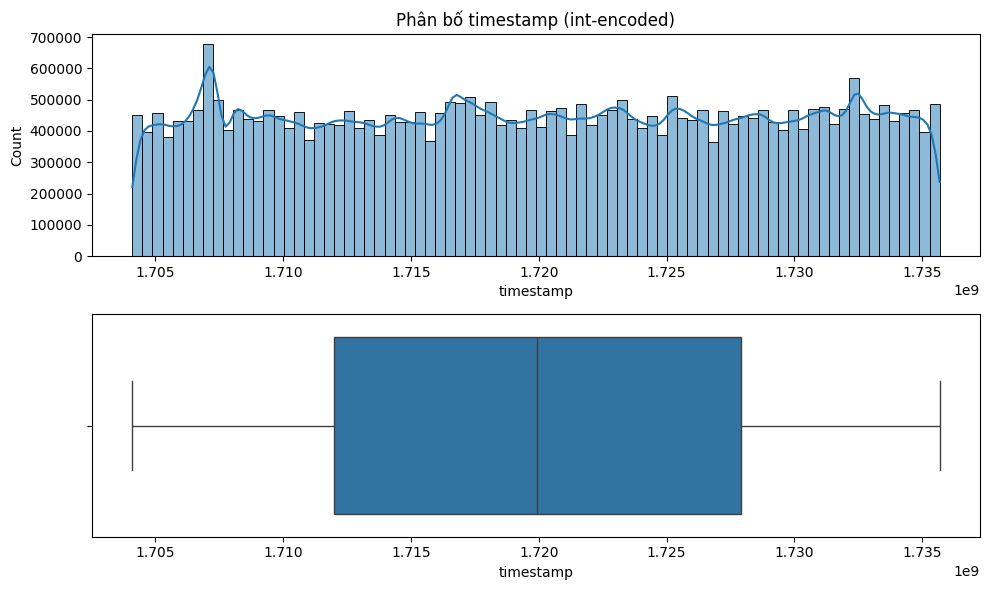

In [50]:
def univariate_int_timestamp(df: pl.DataFrame, col: str = "timestamp", use_log_x: bool = False):

    s = df[col]

    if s.dtype != pl.Int64 and s.dtype != pl.UInt64:
        s = s.cast(pl.Int64)
    s = s.drop_nulls()

    n = s.len()
    n_null = df[col].null_count()
    n_unique = s.n_unique()
    arr = s.to_numpy()
    p = np.percentile(arr, [1, 25, 50, 75, 99])

    print(f"[{col}] n={n:,} | null={int(n_null):,} | unique={int(n_unique):,}")
    print(f"min={arr.min():,}  p1={int(p[0]):,}  p25={int(p[1]):,}  "
          f"median={int(p[2]):,}  p75={int(p[3]):,}  p99={int(p[4]):,}  max={arr.max():,}")

    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(arr, bins=80, kde=True)
    if use_log_x:
        plt.xscale("log")
        plt.xlabel(f"{col} (log scale)")
    else:
        plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Ph√¢n b·ªë {col} (int-encoded)")

    # Boxplot
    plt.subplot(2, 1, 2)
    sns.boxplot(x=arr, fliersize=2)
    if use_log_x:
        plt.xscale("log")
        plt.xlabel(f"{col} (log scale)")
    else:
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

univariate_int_timestamp(history_df, col="timestamp", use_log_x=False)


In [39]:
vals = [int(x) for x in orders_per_cust["n_orders"].to_list() if x is not None]

# Histogram chu·∫©n (s·ªë ƒë·∫øm)
plt.figure(figsize=(9,5))
sns.histplot(vals, bins=50)
plt.title("Ph√¢n b·ªë s·ªë ƒë∆°n theo kh√°ch h√†ng")
plt.xlabel("S·ªë ƒë∆°n/kh√°ch")
plt.ylabel("S·ªë kh√°ch")
plt.tight_layout()
path1 = os.path.join(outdir, "cust_orders_hist.png")
plt.savefig(path1, dpi=300, bbox_inches="tight"); plt.close()
print("L∆∞u:", path1)

# Histogram tr√™n tr·ª•c X log1p (nh√¨n r√µ long-tail)
plt.figure(figsize=(9,5))
sns.histplot(np.log1p(vals), bins=50)
plt.title("Ph√¢n b·ªë s·ªë ƒë∆°n theo kh√°ch (tr·ª•c log1p)")
plt.xlabel("log1p(S·ªë ƒë∆°n/kh√°ch)")
plt.ylabel("S·ªë kh√°ch")
plt.tight_layout()
path2 = os.path.join(outdir, "cust_orders_hist_log1p.png")
plt.savefig(path2, dpi=300, bbox_inches="tight"); plt.close()
print("L∆∞u:", path2)

L∆∞u: ./images/history-chunk\cust_orders_hist.png
L∆∞u: ./images/history-chunk\cust_orders_hist_log1p.png


### Ph√¢n t√≠ch ph√¢n b·ªë s·ªë ƒë∆°n h√†ng theo kh√°ch h√†ng (log1p)

Bi·ªÉu ƒë·ªì tr√™n th·ªÉ hi·ªán **ph√¢n b·ªë s·ªë ƒë∆°n h√†ng c·ªßa t·ª´ng kh√°ch h√†ng** sau khi √°p d·ª•ng ph√©p bi·∫øn ƒë·ªïi log1p ƒë·ªÉ gi·∫£m ƒë·ªô l·ªách.

**Nh·∫≠n x√©t:**
- Ph√¢n b·ªë **l·ªách ph·∫£i r·∫•t m·∫°nh (right-skewed)**: ph·∫ßn l·ªõn kh√°ch h√†ng ch·ªâ c√≥ **1‚Äì2 ƒë∆°n h√†ng**, trong khi m·ªôt s·ªë r·∫•t √≠t kh√°ch h√†ng c√≥ s·ªë ƒë∆°n cao h∆°n nhi·ªÅu, k√©o ƒëu√¥i ph√¢n b·ªë d√†i sang ph·∫£i.  
- ƒê∆∞·ªùng histogram c√≥ d·∫°ng **‚ÄúrƒÉng c∆∞a‚Äù (l√≤i l√µm)** l√† do d·ªØ li·ªáu **r·ªùi r·∫°c (integer)** ‚Äî c√°c gi√° tr·ªã nh∆∞ 1, 2, 3, 5, 10 ƒë∆°n th∆∞·ªùng xu·∫•t hi·ªán nhi·ªÅu h∆°n h·∫≥n, t·∫°o c√°c ‚Äúƒë·ªânh‚Äù xen k·∫Ω.  
- Hi·ªán t∆∞·ª£ng n√†y l√† **b√¨nh th∆∞·ªùng**, ph·∫£n √°nh ƒë√∫ng h√†nh vi mua s·∫Øm th·ª±c t·∫ø:  
  ph·∫ßn l·ªõn ng∆∞·ªùi d√πng ch·ªâ mua 1‚Äì2 l·∫ßn, trong khi nh√≥m nh·ªè kh√°ch h√†ng trung th√†nh mua r·∫•t nhi·ªÅu.

**K·∫øt lu·∫≠n:**  
D·ªØ li·ªáu **kh√¥ng c√≥ b·∫•t th∆∞·ªùng nghi√™m tr·ªçng**, nh∆∞ng **r·∫•t m·∫•t c√¢n b·∫±ng** gi·ªØa nh√≥m kh√°ch h√†ng √≠t mua v√† nh√≥m kh√°ch h√†ng th∆∞·ªùng xuy√™n


# Task 2

In [14]:
from scipy.stats import chi2_contingency
# --- Danh s√°ch c√°c c·ªôt ph√¢n lo·∫°i ---
categorical_columns = ["channel", "payment", "location"]

# --- Dictionary l∆∞u k·∫øt qu·∫£ ---
results = {}

# --- L·∫∑p qua t·ª´ng c·∫∑p bi·∫øn ph√¢n lo·∫°i ---
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i + 1:]:
        print(f"üîπ Processing Chi-squared test for {col1} √ó {col2} ...")

        # T·∫°o b·∫£ng t·∫ßn su·∫•t (contingency table)
        contingency_df = (
            history_df
            .select([col1, col2])
            .fill_null("Unknown")                # thay th·∫ø gi√° tr·ªã null
            .group_by([col1, col2])
            .len()                               # ƒë·∫øm s·ªë l∆∞·ª£ng t·ª´ng t·ªï h·ª£p
            .pivot(values="len", index=col1, columns=col2)
            .fill_null(0)                        # thay null b·∫±ng 0
        )

        # L·∫•y d·ªØ li·ªáu d·∫°ng numpy
        contingency_table = contingency_df.select(pl.exclude(col1)).to_numpy()

        # N·∫øu b·∫£ng qu√° nh·ªè ho·∫∑c ch·ªâ c√≥ 1 h√†ng/c·ªôt th√¨ b·ªè qua
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            print(f"‚ö†Ô∏è B·ªè qua {col1} √ó {col2} (ch·ªâ c√≥ 1 gi√° tr·ªã duy nh·∫•t trong 1 bi·∫øn)")
            continue

        # 3Ô∏è‚É£ Th·ª±c hi·ªán ki·ªÉm ƒë·ªãnh Chi-squared
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # 4Ô∏è‚É£ L∆∞u k·∫øt qu·∫£
        results[(col1, col2)] = {
            "chi2_statistic": chi2,
            "p_value": p,
            "degrees_of_freedom": dof,
            "significant": p < 0.05
        }

# --- In k·∫øt qu·∫£ ---
print("\nK·∫øt qu·∫£ ki·ªÉm ƒë·ªãnh Chi-squared gi·ªØa c√°c c·∫∑p bi·∫øn ph√¢n lo·∫°i:\n")
for (col1, col2), result in results.items():
    print(f"{col1} √ó {col2}:")
    print(f"  ‚Üí œá¬≤ = {result['chi2_statistic']:.2f}, p = {result['p_value']:.4f}, df = {result['degrees_of_freedom']}")
    if result["significant"]:
        print("C√≥ m·ªëi li√™n h·ªá c√≥ √Ω nghƒ©a th·ªëng k√™ (p < 0.05)")
    else:
        print("Kh√¥ng c√≥ m·ªëi li√™n h·ªá ƒë√°ng k·ªÉ (p ‚â• 0.05)")
    print()

üîπ Processing Chi-squared test for channel √ó payment ...


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3055133420.py:20: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


üîπ Processing Chi-squared test for channel √ó location ...
üîπ Processing Chi-squared test for payment √ó location ...

K·∫øt qu·∫£ ki·ªÉm ƒë·ªãnh Chi-squared gi·ªØa c√°c c·∫∑p bi·∫øn ph√¢n lo·∫°i:

channel √ó payment:
  ‚Üí œá¬≤ = 24857243.86, p = 0.0000, df = 90
C√≥ m·ªëi li√™n h·ªá c√≥ √Ω nghƒ©a th·ªëng k√™ (p < 0.05)

channel √ó location:
  ‚Üí œá¬≤ = 37228229.48, p = 0.0000, df = 7640
C√≥ m·ªëi li√™n h·ªá c√≥ √Ω nghƒ©a th·ªëng k√™ (p < 0.05)

payment √ó location:
  ‚Üí œá¬≤ = 7279800.00, p = 0.0000, df = 6876
C√≥ m·ªëi li√™n h·ªá c√≥ √Ω nghƒ©a th·ªëng k√™ (p < 0.05)



**Nh·∫≠n x√©t:**
- T·∫•t c·∫£ c√°c c·∫∑p bi·∫øn ƒë·ªÅu c√≥ **p-value < 0.05**, ch·ª©ng t·ªè **c√°c bi·∫øn ph√¢n lo·∫°i kh√¥ng ƒë·ªôc l·∫≠p** v·ªõi nhau.  
- C·ª• th·ªÉ:
  - **Channel v√† Payment** c√≥ m·ªëi li√™n h·ªá r√µ r√†ng ‚Äî h√¨nh th·ª©c thanh to√°n th∆∞·ªùng ph·ª• thu·ªôc v√†o k√™nh b√°n h√†ng (v√≠ d·ª•: c·ª≠a h√†ng th∆∞·ªùng d√πng ti·ªÅn m·∫∑t, online ∆∞u ti√™n v√≠ ƒëi·ªán t·ª≠).  
  - **Channel v√† Location** c≈©ng li√™n quan ch·∫∑t ch·∫Ω ‚Äî m·ªôt s·ªë ƒë·ªãa ƒëi·ªÉm ch·ªâ h·ªó tr·ª£ m·ªôt s·ªë k√™nh b√°n c·ª• th·ªÉ.  
  - **Payment v√† Location** cho th·∫•y h√¨nh th·ª©c thanh to√°n thay ƒë·ªïi theo khu v·ª±c (v√πng trung t√¢m c√≥ th·ªÉ ph·ªï bi·∫øn QR, v√πng kh√°c ch·ªß y·∫øu ti·ªÅn m·∫∑t).  

In [18]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

categorical_cols = ["channel", "payment", "location"]

def cramers_v_pl(df: pl.DataFrame, col1: str, col2: str) -> float:
    # B·∫£ng t·∫ßn su·∫•t
    freq_df = (
        df
        .select([col1, col2])
        .fill_null("Unknown")
        .group_by([col1, col2])
        .len()
    )

    # Pivot sang ma tr·∫≠n t·∫ßn su·∫•t
    pivot_df = (
        freq_df
        .pivot(values="len", index=col1, columns=col2, aggregate_function=None)
        .fill_null(0)
    )

    # N·∫øu thi·∫øu chi·ªÅu, tr·∫£ v·ªÅ NaN
    if pivot_df.height < 2 or (pivot_df.width - 1) < 2:
        return np.nan

    # Ch·ªâ gi·ªØ c·ªôt s·ªë v√† √©p ki·ªÉu v·ªÅ float ƒë·ªÉ tr√°nh dtype=object
    numeric_df = (
        pivot_df
        .drop(col1)                              # b·ªè c·ªôt index
        .select(pl.all().cast(pl.Float64))       # √©p t·∫•t c·∫£ c·ªôt v·ªÅ s·ªë
    )

    contingency_table = numeric_df.to_numpy()    # ndarray float

    # Chi-squared
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum()
    k = min(contingency_table.shape) - 1
    if n == 0 or k == 0:
        return np.nan
    return float(np.sqrt(chi2 / (n * k)))

# T√≠nh ma tr·∫≠n Cramer's V
n = len(categorical_cols)
cramer_matrix = np.zeros((n, n))
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i == j:
            cramer_matrix[i, j] = 1.0
        else:
            cramer_matrix[i, j] = cramers_v_pl(history_df, col1, col2)
        print(f"Cram√©r‚Äôs V({col1}, {col2}) = {cramer_matrix[i, j]:.3f}")

# V·∫Ω & l∆∞u heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cramer_matrix, annot=True, cmap="YlOrBr", fmt=".2f",
    xticklabels=categorical_cols, yticklabels=categorical_cols, square=True
)
plt.title("Ma tr·∫≠n Cram√©r‚Äôs V gi·ªØa c√°c bi·∫øn ph√¢n lo·∫°i", fontsize=13)
plt.tight_layout()

output_path = os.path.join(output_folder, "cramers_v_matrix.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()
print(f"\n ƒê√£ l∆∞u bi·ªÉu ƒë·ªì Cram√©r‚Äôs V t·∫°i: {output_path}")

Cram√©r‚Äôs V(channel, channel) = 1.000


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\358987356.py:19: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2, aggregate_function=None)


Cram√©r‚Äôs V(channel, payment) = 0.278
Cram√©r‚Äôs V(channel, location) = 0.323
Cram√©r‚Äôs V(payment, channel) = 0.278
Cram√©r‚Äôs V(payment, payment) = 1.000
Cram√©r‚Äôs V(payment, location) = 0.150
Cram√©r‚Äôs V(location, channel) = 0.323
Cram√©r‚Äôs V(location, payment) = 0.150
Cram√©r‚Äôs V(location, location) = 1.000

 ƒê√£ l∆∞u bi·ªÉu ƒë·ªì Cram√©r‚Äôs V t·∫°i: ./images/history-chunk\cramers_v_matrix.png


**Nh·∫≠n x√©t:**
- C√°c gi√° tr·ªã **Cram√©r‚Äôs V < 0.35**, cho th·∫•y **m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn ph√¢n lo·∫°i l√† trung b√¨nh ho·∫∑c y·∫øu**, kh√¥ng c√≥ t∆∞∆°ng quan qu√° m·∫°nh (tr·ª´ c√°c bi·∫øn v·ªõi ch√≠nh n√≥).  
- **Channel v√† Payment (V = 0.278)** c√≥ m·ªëi li√™n h·ªá ·ªü m·ª©c **trung b√¨nh**, ph√π h·ª£p v·ªõi th·ª±c t·∫ø: ph∆∞∆°ng th·ª©c thanh to√°n th∆∞·ªùng g·∫Øn v·ªõi lo·∫°i k√™nh b√°n h√†ng.  
- **Channel v√† Location (V = 0.323)** c≈©ng c√≥ t∆∞∆°ng quan trung b√¨nh ‚Äî m·ªôt s·ªë khu v·ª±c c√≥ th·ªÉ ch·ªâ ho·∫°t ƒë·ªông m·∫°nh ·ªü m·ªôt v√†i k√™nh c·ª• th·ªÉ.  
- **Payment v√† Location (V = 0.150)** ch·ªâ c√≥ t∆∞∆°ng quan y·∫øu, cho th·∫•y h√¨nh th·ª©c thanh to√°n √≠t b·ªã ·∫£nh h∆∞·ªüng b·ªüi v·ªã tr√≠ ƒë·ªãa l√Ω.

In [ ]:
def plot_crosstab_heatmap(df, col1, col2, top_x=10, show=True):
    """
    V·∫Ω heatmap t·∫ßn su·∫•t gi·ªØa hai c·ªôt ph√¢n lo·∫°i
    """
    # --- T·∫°o th∆∞ m·ª•c n·∫øu ch∆∞a c√≥ ---
    output_folder = "./images/history-chunk"
    os.makedirs(output_folder, exist_ok=True)

    # --- L·∫•y top gi√° tr·ªã ph·ªï bi·∫øn ---
    top1 = (
        df.group_by(col1)
        .len()
        .sort("len", descending=True)
        .head(top_x)[col1]
        .to_list()
    )
    top2 = (
        df.group_by(col2)
        .len()
        .sort("len", descending=True)
        .head(top_x)[col2]
        .to_list()
    )

    # --- B·∫£ng ch√©o (pivot) ---
    pivot_df = (
        df.filter(pl.col(col1).is_in(top1) & pl.col(col2).is_in(top2))
        .group_by([col1, col2])
        .len()
        .pivot(values="len", index=col1, columns=col2)
        .fill_null(0)
    )

    # --- D·ªØ li·ªáu ƒë·ªÉ v·∫Ω ---
    data = pivot_df.select(pl.exclude(col1)).to_numpy()
    xlabels = pivot_df.columns[1:]
    ylabels = pivot_df[col1].to_list()

    # --- V·∫Ω heatmap ---
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        data,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        xticklabels=xlabels,
        yticklabels=ylabels
    )
    plt.title(f"Ph√¢n b·ªë {col1} √ó {col2}", fontsize=13)
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()

    # --- L∆∞u h√¨nh ---
    filename = f"{col1}_{col2}_heatmap.png".replace(" ", "_")
    output_path = os.path.join(output_folder, filename)
    plt.savefig(output_path, bbox_inches="tight", dpi=300)

    # --- Tu·ª≥ ch·ªçn hi·ªÉn th·ªã ---
    if show:
        plt.show()
    else:
        plt.close()

    print(f"‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì heatmap {col1} √ó {col2} t·∫°i: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_15280\3486570824.py:36: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


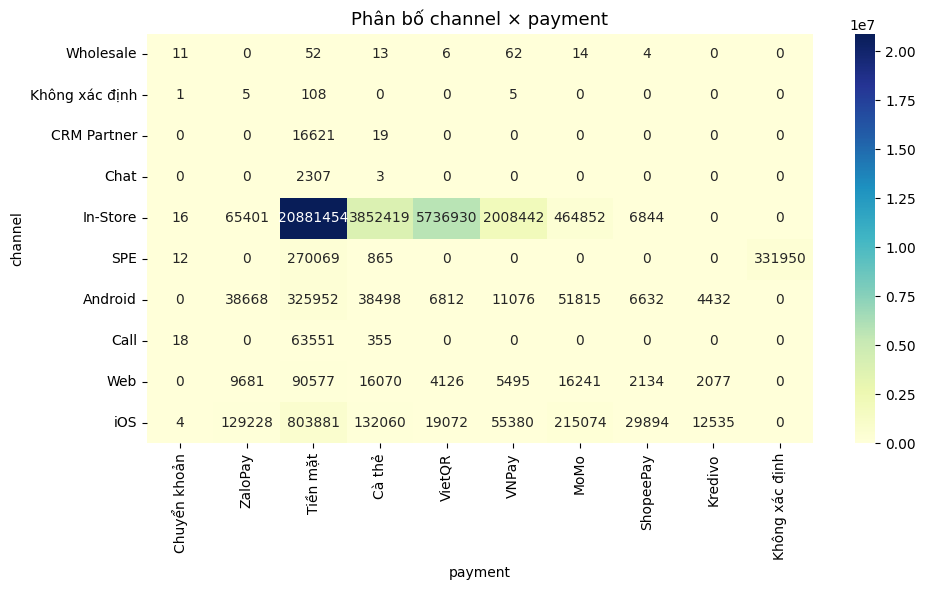

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì heatmap channel √ó payment t·∫°i: ./images/history-chunk\channel_payment_heatmap.png


In [20]:
plot_crosstab_heatmap(history_df, "channel", "payment")

**Nh·∫≠n x√©t:**
- **K√™nh ‚ÄúIn-Store‚Äù** chi·∫øm √°p ƒë·∫£o to√†n b·ªô giao d·ªãch, ƒë·∫∑c bi·ªát v·ªõi h√¨nh th·ª©c **‚ÄúTi·ªÅn m·∫∑t‚Äù** v√† **‚ÄúC√† th·∫ª‚Äù** (m√†u ƒë·∫≠m nh·∫•t trong heatmap).  
  ‚Üí ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi ƒë·∫∑c th√π b√°n l·∫ª truy·ªÅn th·ªëng ‚Äî ph·∫ßn l·ªõn giao d·ªãch tr·ª±c ti·∫øp t·∫°i c·ª≠a h√†ng.  
- C√°c k√™nh **iOS** v√† **Android** c≈©ng c√≥ ph√¢n b·ªë r√µ r·ªát ·ªü c√°c v√≠ ƒëi·ªán t·ª≠ nh∆∞ **MoMo, ZaloPay, VNPay**, ph·∫£n √°nh h√†nh vi thanh to√°n ph·ªï bi·∫øn c·ªßa ng∆∞·ªùi d√πng di ƒë·ªông.  
- C√°c k√™nh kh√°c nh∆∞ **Web**, **SPE**, ho·∫∑c **Call** c√≥ s·ªë l∆∞·ª£ng giao d·ªãch r·∫•t th·∫•p, th·ªÉ hi·ªán **m·ª©c ƒë·ªô s·ª≠ d·ª•ng h·∫°n ch·∫ø**.  
- M·ªôt v√†i k√™nh g·∫ßn nh∆∞ kh√¥ng c√≥ d·ªØ li·ªáu thanh to√°n ƒë√°ng k·ªÉ (nh∆∞ **Wholesale**, **CRM Partner**, **Chat**), c√≥ th·ªÉ l√† do ƒë·∫∑c th√π ho·∫°t ƒë·ªông ri√™ng bi·ªát ho·∫∑c d·ªØ li·ªáu b·ªã thi·∫øu.

C:\Users\tncn2\AppData\Local\Temp\ipykernel_15280\3486570824.py:36: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


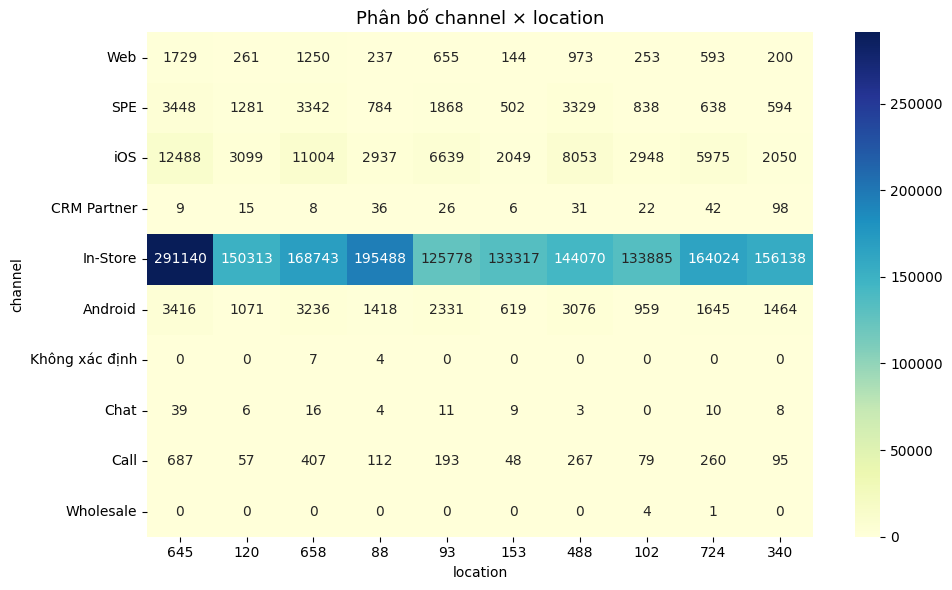

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì heatmap channel √ó location t·∫°i: ./images/history-chunk\channel_location_heatmap.png


In [21]:
plot_crosstab_heatmap(history_df, "channel", "location")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_15280\3486570824.py:36: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


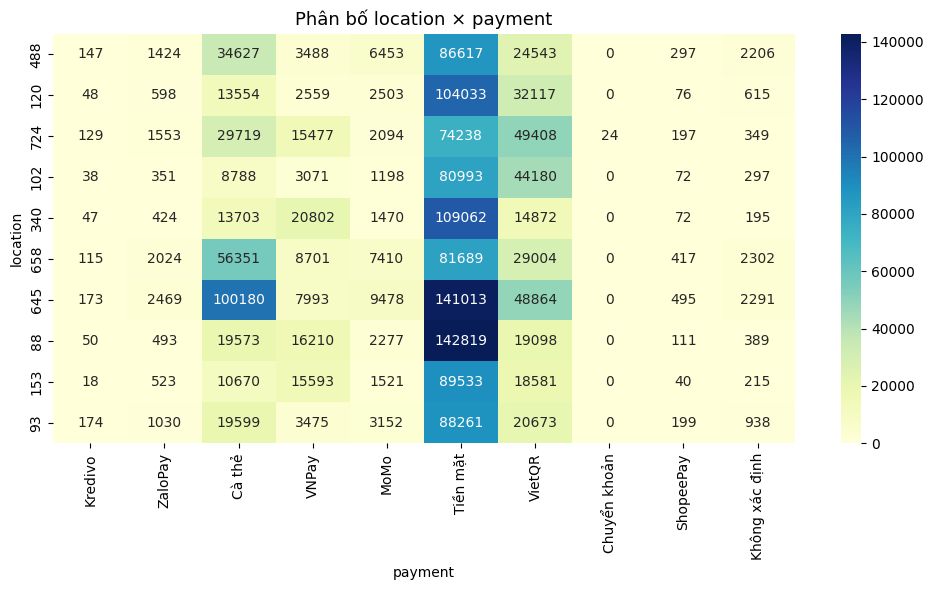

‚úÖ ƒê√£ l∆∞u bi·ªÉu ƒë·ªì heatmap location √ó payment t·∫°i: ./images/history-chunk\location_payment_heatmap.png


In [22]:
plot_crosstab_heatmap(history_df, "location", "payment")

In [6]:
def stacked100(df, row, col, top_row=10, top_col=8, outdir="./images/history-chunk", filename=None):
    os.makedirs(outdir, exist_ok=True)
    if filename is None:
        filename = f"stacked100_{row}_by_{col}.png"

    top_r = df.group_by(row).len().sort("len", descending=True).head(top_row)[row].to_list()
    top_c = df.group_by(col).len().sort("len", descending=True).head(top_col)[col].to_list()

    pv = (df.filter(pl.col(row).is_in(top_r) & pl.col(col).is_in(top_c))
            .group_by([row, col]).len()
            .pivot(values="len", index=row, columns=col)
            .fill_null(0))
    if pv.is_empty(): return None

    rows, cols = pv[row].to_list(), pv.columns[1:]
    M = pv.select(pl.exclude(row)).to_numpy().astype(float)
    M = M / M.sum(axis=1, keepdims=True)

    plt.figure(figsize=(10,5))
    left = np.zeros(M.shape[0])
    for j, c in enumerate(cols):
        plt.barh(rows, M[:,j], left=left, label=c)
        left += M[:,j]
    plt.xlabel("T·ª∑ l·ªá"); plt.ylabel(row)
    plt.title(f"T·ª∑ l·ªá {col} theo {row} (100%)")
    plt.legend(title=col, bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()

    path = os.path.join(outdir, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight"); plt.close()
    print(path)
    return path

In [7]:
stacked100(history_df, "channel", "payment")
stacked100(history_df, "channel", "location")
stacked100(history_df, "payment", "location", top_row=12, top_col=10)

C:\Users\tncn2\AppData\Local\Temp\ipykernel_10500\2465017598.py:11: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=row, columns=col)


./images/history-chunk\stacked100_channel_by_payment.png
./images/history-chunk\stacked100_channel_by_location.png
./images/history-chunk\stacked100_payment_by_location.png


'./images/history-chunk\\stacked100_payment_by_location.png'

In [48]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

df2 = (history_df
       .select([
           pl.col("price").cast(pl.Float64).alias("price"),
           pl.col("discount").cast(pl.Float64).alias("discount")
       ])
       .drop_nulls()
       .with_columns([
           pl.when(pl.col("price")   < 0).then(0).otherwise(pl.col("price")).alias("price"),
           pl.when(pl.col("discount")< 0).then(0).otherwise(pl.col("discount")).alias("discount"),
       ])
)

MAX_POINTS = 500_000
dfp = df2.sample(n=MAX_POINTS, with_replacement=False, seed=42) if df2.height > MAX_POINTS else df2

x = dfp["price"].to_list()
y = dfp["discount"].to_list()

# 3a) Scatter th∆∞·ªùng
plt.figure(figsize=(7,6))
sns.scatterplot(x=x, y=y, s=6, alpha=0.2, edgecolor=None)
plt.title("Scatter: price vs discount")
plt.xlabel("price"); plt.ylabel("discount")
plt.tight_layout()
p1 = os.path.join(output_folder, "scatter_price_discount.png")
plt.savefig(p1, dpi=300, bbox_inches="tight"); plt.close()
print("L∆∞u:", p1)

# 3b) Scatter log1p 
x_log = np.log1p(np.asarray(x)); y_log = np.log1p(np.asarray(y))
plt.figure(figsize=(7,6))
sns.scatterplot(x=x_log, y=y_log, s=6, alpha=0.2, edgecolor=None)
plt.title("Scatter (log1p): price vs discount")
plt.xlabel("log1p(price)"); plt.ylabel("log1p(discount)")
plt.tight_layout()
p2 = os.path.join(output_folder, "scatter_price_discount_log1p.png")
plt.savefig(p2, dpi=300, bbox_inches="tight"); plt.close()
print("L∆∞u:", p2)

plt.figure(figsize=(7,6))
plt.hexbin(x, y, gridsize=60, mincnt=1, bins="log", cmap="viridis")
plt.colorbar(label="log(count)")
plt.title("Hexbin: price vs discount")
plt.xlabel("price"); plt.ylabel("discount")
plt.tight_layout()
p3 = os.path.join(output_folder, "hexbin_price_discount.png")
plt.savefig(p3, dpi=300, bbox_inches="tight"); plt.close()
print("L∆∞u:", p3)

L∆∞u: ./images/history-chunk\scatter_price_discount.png
L∆∞u: ./images/history-chunk\scatter_price_discount_log1p.png
L∆∞u: ./images/history-chunk\hexbin_price_discount.png


**Nh·∫≠n x√©t:**
- Sau khi log-transform, d·ªØ li·ªáu tr·ªü n√™n **ph√¢n b·ªë r√µ r√†ng h∆°n**, kh√¥ng c√≤n b·ªã d·ªìn v·ªÅ g√≥c (0, 0) nh∆∞ tr∆∞·ªõc.  
- C√≥ **xu h∆∞·ªõng ƒë·ªìng bi·∫øn nh·∫π** gi·ªØa `price` v√† `discount`: s·∫£n ph·∫©m c√≥ gi√° cao th∆∞·ªùng ƒëi k√®m v·ªõi m·ª©c gi·∫£m gi√° l·ªõn h∆°n.  
- Tuy nhi√™n, v·∫´n xu·∫•t hi·ªán **d·∫£i ƒëi·ªÉm n·∫±m ngang ·ªü log(discount) = 0**, bi·ªÉu th·ªã nh·ªØng s·∫£n ph·∫©m **kh√¥ng c√≥ gi·∫£m gi√°**.  
- Ngo√†i ra, v·∫´n t·ªìn t·∫°i **m·ªôt s·ªë c·ª•m d√†y b·∫•t th∆∞·ªùng** ·ªü c√°c m·ª©c log(price) ~10‚Äì13 v√† log(discount) ~9‚Äì12, cho th·∫•y kh·∫£ nƒÉng **c√≥ nh√≥m s·∫£n ph·∫©m gi√° cao ƒë∆∞·ª£c gi·∫£m m·∫°nh theo ch∆∞∆°ng tr√¨nh nh·∫•t ƒë·ªãnh**.  
- Kh√¥ng ph√°t hi·ªán m·ªëi quan h·ªá tuy·∫øn t√≠nh ho√†n to√†n.

In [8]:
df = history_df.select(["user_id", "customer_id"]).drop_nulls()

n_rows       = df.height
n_user       = df["user_id"].n_unique()
n_customer   = df["customer_id"].n_unique()
n_pairs      = df.unique().height

print(f"rows={n_rows:,} | unique user={n_user:,} | unique customer={n_customer:,} | unique pairs={n_pairs:,}")

u_to_c = (df.group_by("user_id")
            .agg(pl.col("customer_id").n_unique().alias("n_customer"))
            .sort("n_customer", descending=True))

c_to_u = (df.group_by("customer_id")
            .agg(pl.col("user_id").n_unique().alias("n_user"))
            .sort("n_user", descending=True))

pct_user_one_customer    = (u_to_c.filter(pl.col("n_customer")==1).height / u_to_c.height)
pct_customer_one_user    = (c_to_u.filter(pl.col("n_user")==1).height / c_to_u.height)

print(f"User -> Customer:  p(=1 customer) = {pct_user_one_customer:.2%},  max={u_to_c['n_customer'][0]}")
print(f"Customer -> User:  p(=1 user)     = {pct_customer_one_user:.2%},  max={c_to_u['n_user'][0]}")

if pct_user_one_customer==1 and pct_customer_one_user==1 and n_pairs==n_user==n_customer:
    print("Quan h·ªá 1‚Äì1 (m·ªôt-m·ªôt).")
elif pct_user_one_customer==1 and pct_customer_one_user<1:
    print("Quan h·ªá n‚Äì1: m·ªói user g·∫Øn ƒë√∫ng 1 customer, nh∆∞ng 1 customer c√≥ nhi·ªÅu user.")
elif pct_user_one_customer<1 and pct_customer_one_user==1:
    print("Quan h·ªá 1‚Äìn: m·ªói customer g·∫Øn ƒë√∫ng 1 user, nh∆∞ng 1 user c√≥ nhi·ªÅu customer.")
else:
    print("Quan h·ªá n‚Äìn: c·∫£ hai ph√≠a ƒë·ªÅu c√≥ b·∫£n ghi g·∫Øn nhi·ªÅu ƒë·ªëi t∆∞·ª£ng.")

print("\nTop user c√≥ >1 customer:")
print(u_to_c.filter(pl.col("n_customer")>1).head(10))

print("\nTop customer c√≥ >1 user:")
print(c_to_u.filter(pl.col("n_user")>1).head(10))

rows=35,729,825 | unique user=2,442,306 | unique customer=2,442,306 | unique pairs=2,442,306
User -> Customer:  p(=1 customer) = 100.00%,  max=1
Customer -> User:  p(=1 user)     = 100.00%,  max=1
Quan h·ªá 1‚Äì1 (m·ªôt-m·ªôt).

Top user c√≥ >1 customer:
shape: (0, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ user_id ‚îÜ n_customer ‚îÇ
‚îÇ ---     ‚îÜ ---        ‚îÇ
‚îÇ str     ‚îÜ u32        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Top customer c√≥ >1 user:
shape: (0, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ customer_id ‚îÜ n_user ‚îÇ
‚îÇ ---         ‚îÜ ---    ‚îÇ
‚îÇ i32         ‚îÜ u32    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


**Ph√¢n t√≠ch quan h·ªá:**
- `User ‚Üí Customer`: 100% user ch·ªâ g·∫Øn v·ªõi **m·ªôt customer duy nh·∫•t**.  
- `Customer ‚Üí User`: 100% customer ch·ªâ g·∫Øn v·ªõi **m·ªôt user duy nh·∫•t**.  
- Kh√¥ng c√≥ tr∆∞·ªùng h·ª£p n√†o user ho·∫∑c customer li√™n k·∫øt v·ªõi nhi·ªÅu b√™n.

**K·∫øt lu·∫≠n:**  
Quan h·ªá gi·ªØa **`user_id` v√† `customer_id` l√† m·ªôt ‚Äì m·ªôt (1‚Äì1)**, th·ªÉ hi·ªán r·∫±ng **m·ªói ng∆∞·ªùi d√πng trong h·ªá th·ªëng t∆∞∆°ng ·ª©ng duy nh·∫•t v·ªõi m·ªôt kh√°ch h√†ng**.  

In [ ]:

output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# Bao g·ªìm: Int*, Float*, Decimal*, UInt*; lo·∫°i tr·ª´: Datetime, String, Boolean
numeric_cols = [c for c, dt in history_df.schema.items() if dt in pl.NUMERIC_DTYPES]


exclude = {"customer_id", "location"}  # v√≠ d·ª•: location l√† m√£ khu v·ª±c (categorical)
numeric_cols = [c for c in numeric_cols if c not in exclude]

if len(numeric_cols) < 2:
    raise ValueError(f"Kh√¥ng ƒë·ªß >=2 c·ªôt numerical ƒë·ªÉ t√≠nh t∆∞∆°ng quan. T√¨m th·∫•y: {numeric_cols}")

# --- 2) √âp ki·ªÉu v·ªÅ Float64 ƒë·ªÉ an to√†n (k·ªÉ c·∫£ Decimal) ---
df_num = history_df.select([pl.col(c).cast(pl.Float64).alias(c) for c in numeric_cols])

# --- 3) T√≠nh Spearman: Pearson c·ªßa th·ª© h·∫°ng ---
# Rank t·ª´ng c·ªôt v·ªõi ph∆∞∆°ng ph√°p "average" cho ties
df_rank = df_num.select([pl.col(c).rank(method="average").alias(c) for c in numeric_cols])

# Ma tr·∫≠n th·ª© h·∫°ng (rows = samples, cols = variables)
R = df_rank.to_numpy()  # shape: (n_samples, n_features)

# Pearson correlation tr√™n ma tr·∫≠n rank -> Spearman
spearman_corr = np.corrcoef(R, rowvar=False)  # shape: (n_features, n_features)

# --- 4) V·∫Ω heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    np.nan_to_num(spearman_corr, nan=0.0),  # tr√°nh NaN khi c√≥ c·ªôt h·∫±ng
    annot=True, fmt=".2f", cmap="coolwarm", square=True,
    xticklabels=numeric_cols, yticklabels=numeric_cols
)
plt.title("Spearman Correlation (numeric columns)", fontsize=13)
plt.tight_layout()

# --- 5) L∆∞u ·∫£nh ---
out_path = os.path.join(output_folder, "spearman_corr_numeric.png")
plt.savefig(out_path, bbox_inches="tight", dpi=300)
plt.close()
print(f"ƒê√£ l∆∞u heatmap Spearman t·∫°i: {out_path}")

# --- 6) (Tu·ª≥ ch·ªçn) L∆∞u ma tr·∫≠n ra CSV b·∫±ng Polars ---
spearman_pl = pl.DataFrame(spearman_corr, schema=numeric_cols).with_columns(
    pl.Series("feature", numeric_cols)
).select(["feature", *numeric_cols])

csv_path = os.path.join(output_folder, "spearman_corr_numeric.csv")
spearman_pl.write_csv(csv_path)
print(f"ƒê√£ l∆∞u ma tr·∫≠n Spearman CSV t·∫°i: {csv_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3492777074.py:7: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  numeric_cols = [c for c, dt in history_df.schema.items() if dt in pl.NUMERIC_DTYPES]


ƒê√£ l∆∞u heatmap Spearman t·∫°i: ./images/history-chunk\spearman_corr_numeric.png
ƒê√£ l∆∞u ma tr·∫≠n Spearman CSV t·∫°i: ./images/history-chunk\spearman_corr_numeric.csv


In [15]:
df2 = history_df.select([
    pl.col("event_value").cast(pl.Float64).alias("y"),
    pl.col("quantity").cast(pl.Float64).alias("x"),
]).drop_nulls()

# 2) Ki·ªÉm tra c√≥ gi·ªëng h·ªát nhau kh√¥ng (max |y - x| == 0)
same = df2.select((pl.col("y") - pl.col("x")).abs().max()).item() == 0.0

# 3) Pearson (‚âà1 n·∫øu tuy·∫øn t√≠nh m·∫°nh)
pearson = df2.select(pl.corr("y", "x")).item()

# 4) Spearman (ƒë∆°n ƒëi·ªáu ho√†n h·∫£o n·∫øu =1.0)
# C√°ch A (n·∫øu b·∫£n Polars h·ªó tr·ª£):
# spearman = df2.select(pl.spearman_rank_corr("y","x")).item()
# C√°ch B (an to√†n m·ªçi phi√™n b·∫£n): Pearson c·ªßa th·ª© h·∫°ng
spearman = df2.select(
    pl.corr(pl.col("y").rank("average"), pl.col("x").rank("average"))
).item()

print(f"identical={same}, spearman={spearman:.6f}, pearson={pearson:.6f}")

identical=True, spearman=1.000000, pearson=1.000000


- `identical = True` ‚Üí Hai c·ªôt **tr√πng kh·ªõp tuy·ªát ƒë·ªëi** theo t·ª´ng d√≤ng.
- `Spearman = 1.000000` ‚Üí **Quan h·ªá ƒë∆°n ƒëi·ªáu ho√†n h·∫£o** (x·∫øp h·∫°ng gi·ªëng h·ªát).
- `Pearson = 1.000000` ‚Üí **Quan h·ªá tuy·∫øn t√≠nh ho√†n h·∫£o** (m·ªôt c·ªôt l√† h·∫±ng s·ªë nh√¢n/ƒë·ªïi ƒë∆°n v·ªã c·ªßa c·ªôt kia).

**K·∫øt lu·∫≠n**

- `event_value` v√† `quantity` **mang ƒë√∫ng c√πng m·ªôt th√¥ng tin** ‚áí **n√™n gi·ªØ 1 c·ªôt, b·ªè 1 c·ªôt** ƒë·ªÉ tr√°nh d∆∞ th·ª´a v√† ƒëa c·ªông tuy·∫øn.


In [ ]:
def boxplot_by_cat(df, num_col, cat_col, top=10, outdir="./images/history-chunk", filename=None):
    os.makedirs(outdir, exist_ok=True)
    if filename is None:
        filename = f"box_{num_col}_by_{cat_col}.png"

    # L·ªçc top nh√≥m ƒë·ªÉ tr√°nh qu√° nhi·ªÅu nh√£n
    top_vals = (df.group_by(cat_col).len()
                  .sort("len", descending=True)
                  .head(top)[cat_col].to_list())
    
    sub = (df.filter(pl.col(cat_col).is_in(top_vals))
             .select([pl.col(num_col).cast(pl.Float64), pl.col(cat_col)])
             .drop_nulls())

    if sub.height == 0:
        print(f"Kh√¥ng c√≥ d·ªØ li·ªáu h·ª£p l·ªá cho {num_col} theo {cat_col}")
        return None

    plt.figure(figsize=(9,5))
    sns.boxplot(x=sub[cat_col].to_list(), y=sub[num_col].to_list())
    plt.xticks(rotation=25, ha="right")
    plt.title(f"Ph√¢n ph·ªëi {num_col} theo {cat_col}")
    plt.xlabel(cat_col); plt.ylabel(num_col)
    plt.tight_layout()

    path = os.path.join(outdir, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    plt.close()
    print(path)
    return path

In [10]:
# Boxplot: price theo channel
boxplot_by_cat(history_df, num_col="price", cat_col="channel",
               top=12, filename="box_price_by_channel.png")

# Boxplot: price theo payment
boxplot_by_cat(history_df, num_col="price", cat_col="payment",
               top=12, filename="box_price_by_payment.png")

./images/history-chunk\box_price_by_channel.png
./images/history-chunk\box_price_by_payment.png


'./images/history-chunk\\box_price_by_payment.png'

In [11]:
def boxplot_log(df, num_col, cat_col, top=10, outdir="./images/history-chunk", filename=None):
    os.makedirs(outdir, exist_ok=True)
    if filename is None:
        filename = f"boxlog_{num_col}_by_{cat_col}.png"

    # L·∫•y top nh√≥m ph·ªï bi·∫øn nh·∫•t
    top_vals = (df.group_by(cat_col).len()
                  .sort("len", descending=True)
                  .head(top)[cat_col].to_list())

    # L·∫•y d·ªØ li·ªáu numeric + log transform
    sub = (df.filter(pl.col(cat_col).is_in(top_vals))
             .select([pl.col(cat_col), pl.col(num_col).cast(pl.Float64)])
             .drop_nulls())
    if sub.height == 0:
        print(f"Kh√¥ng c√≥ d·ªØ li·ªáu cho {num_col} theo {cat_col}")
        return None

    sub = sub.with_columns(np.log1p(pl.col(num_col)).alias("log_val"))

    # V·∫Ω boxplot
    plt.figure(figsize=(9,5))
    sns.boxplot(x=sub[cat_col].to_list(), y=sub["log_val"].to_list(), color="lightblue")
    plt.xticks(rotation=25, ha="right")
    plt.title(f"log(1+{num_col}) theo {cat_col}")
    plt.xlabel(cat_col); plt.ylabel(f"log(1+{num_col})")
    plt.tight_layout()

    path = os.path.join(outdir, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    plt.close()
    print("‚úÖ L∆∞u t·∫°i:", path)
    return path

In [12]:
# Boxplot log(1+price) theo channel
boxplot_log(history_df, "price", "channel", filename="boxlog_price_by_channel.png")

# Boxplot log(1+price) theo payment
boxplot_log(history_df, "price", "payment", filename="boxlog_price_by_payment.png")

‚úÖ L∆∞u t·∫°i: ./images/history-chunk\boxlog_price_by_channel.png
‚úÖ L∆∞u t·∫°i: ./images/history-chunk\boxlog_price_by_payment.png


'./images/history-chunk\\boxlog_price_by_payment.png'

# Task 3: 
- Nh·ªØng tr∆∞·ªùng th√¥ng tin n√†o kh√¥ng c√≥ nhi·ªÅu th√¥ng tin --> n√™n lo·∫°i b·ªè
- Nh·ªØng tr∆∞·ªùng th√¥ng tin n√†o c·∫ßn x·ª≠ l√Ω NULL
- Nh·ªØng tr∆∞·ªùng th√¥ng tin n√†o c·∫ßn x·ª≠ l√Ω ngo·∫°i l·ªá (Outlier)
- Nh·ªØng tr∆∞·ªùng th√¥ng tin n√†o c·∫ßn x·ª≠ l√Ω ph√¢n b·ªë kh√¥ng ƒë·ªÅu?

# Sau ƒë√¢y l√† c√°c b∆∞·ªõc c·∫ßn l√†m ·ªü **data preprocessing** sau khi EDA

---

## I. X·ª≠ l√Ω c√°c tr∆∞·ªùng **kh√¥ng c√≥ nhi·ªÅu th√¥ng tin**
**G·ªìm:** `event_type`, `is_deleted`

### 1) `event_type`
- **L√Ω do (EDA):** Ch·ªâ c√≥ **1 gi√° tr·ªã duy nh·∫•t** `"Purchase"` tr√™n **35.7M** d√≤ng ‚Üí bi·∫øn h·∫±ng, **kh√¥ng mang th√¥ng tin ph√¢n t√°ch**.
- **X·ª≠ l√Ω:** **Lo·∫°i b·ªè** kh·ªèi t·∫≠p ƒë·∫∑c tr∆∞ng.

### 2) `is_deleted`
- **L√Ω do (EDA):** To√†n b·ªô b·∫£n ghi c√≥ gi√° tr·ªã **`false` (35.7M/35.7M)** ‚Üí bi·∫øn h·∫±ng.
- **X·ª≠ l√Ω:** **Lo·∫°i b·ªè** kh·ªèi t·∫≠p ƒë·∫∑c tr∆∞ng.

---

## II. X·ª≠ l√Ω c√°c tr∆∞·ªùng **c√≥ ngo·∫°i l·ªá (Outlier)**
**G·ªìm:** `price`, `quantity`, `discount`

### 1) `price`
- **L√Ω do (EDA):**
  - **Mean = 169,188‚Ç´**, **Median = 87,000‚Ç´**, **Std ‚âà 195,540‚Ç´**, **Min ‚âà 0.044‚Ç´**, **Max ‚âà 20,990,000‚Ç´** ‚Üí **l·ªách ph·∫£i m·∫°nh**, c√≥ **r·∫•t nhi·ªÅu outlier**; gi√° c·ª±c th·∫•p kh·∫£ nƒÉng **l·ªói nh·∫≠p li·ªáu**.
  - Histogram (log) c√≥ **2 ƒë·ªânh** (‚âà **log 10‚Äì12.5** t∆∞∆°ng ƒë∆∞∆°ng **22k‚Äì270k**), Boxplot c√≥ nhi·ªÅu ƒëi·ªÉm c·ª±c tr·ªã.
- **X·ª≠ l√Ω ƒë·ªÅ xu·∫•t:**
  - D√πng **log1p** khi model/visualize.
  - **L√†m s·∫°ch min b·∫•t th∆∞·ªùng** (v√≠ d·ª• lo·∫°i < 100‚Ç´ ho·∫∑c ki·ªÉm tra ngu·ªìn).
  - **Winsorize/clip** ·ªü **[1%, 99%]** ho·∫∑c theo **IQR** cho modeling nh·∫°y c·∫£m v·ªõi outlier.

### 2) `quantity`
- **L√Ω do (EDA):**
  - Ph·∫ßn l·ªõn **= 1**, c√≥ **ƒëu√¥i r·∫•t d√†i** (kh√°ch nhi·ªÅu ƒë∆°n) ‚Üí **right-skewed**, xu·∫•t hi·ªán nhi·ªÅu ƒëi·ªÉm xa (outlier).
  - `quantity` **tr√πng ho√†n to√†n** v·ªõi `event_value` (xem m·ª•c V) ‚áí n√™n gi·ªØ **m·ªôt c·ªôt**.
- **X·ª≠ l√Ω ƒë·ªÅ xu·∫•t:**
  - D√πng **log1p(quantity)** cho ph√¢n t√≠ch/m√¥ h√¨nh.
  - N·∫øu c·∫ßn kh·ª≠ nhi·ªÖu, **clip** ·ªü **P99** (ho·∫∑c IQR).
  - **Gi·ªØ `quantity`, b·ªè `event_value`** ƒë·ªÉ tr√°nh tr√πng th√¥ng tin.

### 3) `discount`
- **L√Ω do (EDA):**
  - **Median = 0**, **Mean ‚âà 17,235**, **Std ‚âà 46,674**, **Max ‚âà 7,995,000** ‚Üí **l·ªách ph·∫£i r·∫•t m·∫°nh**.
  - Histogram **2 ƒë·ªânh**: **ƒë·ªânh l·ªõn t·∫°i 0** (kh√¥ng gi·∫£m) v√† **ƒë·ªânh nh·ªè t·∫°i log‚âà10** (gi·∫£m th·∫≠t s·ª±) ‚Üí **hai nh√≥m t·ª± nhi√™n**.
- **X·ª≠ l√Ω ƒë·ªÅ xu·∫•t:**
  - D√πng **log1p(discount)** cho m√¥ h√¨nh.
  - T·∫°o bi·∫øn **nh·ªã ph√¢n**: `has_discount = (discount > 0)` ƒë·ªÉ t√°ch **2 nh√≥m**.
  - V·ªõi m√¥ h√¨nh nh·∫°y outlier: **clip** ·ªü **P99** (gi·ªØ l·∫°i c·∫•u tr√∫c nh∆∞ng gi·∫£m ·∫£nh h∆∞·ªüng c·ª±c tr·ªã).

---

## IV. X·ª≠ l√Ω c√°c tr∆∞·ªùng **c√≥ ph√¢n b·ªë kh√¥ng ƒë·ªìng ƒë·ªÅu**
**G·ªìm:** `location`, `discount`, `channel`

### 1) `location`
- **L√Ω do (EDA):** R·∫•t m·∫•t c√¢n b·∫±ng: m·ªôt s·ªë `location` c√≥ **>300k** b·∫£n ghi, ƒëa s·ªë ch·ªâ **v√†i trƒÉm** ‚Üí ngay c·∫£ thang **log** v·∫´n th·∫•y **ch√™nh l·ªách l·ªõn**.
- **X·ª≠ l√Ω ƒë·ªÅ xu·∫•t:**
  - **G·ªôp/nh√≥m** c√°c `location` hi·∫øm th√†nh `"Other"` theo ng∆∞·ª°ng (v√≠ d·ª• < 0.1% t·ªïng s·ªë).
  - D√πng **target/frequency encoding** thay v√¨ one-hot tr√†n chi·ªÅu.
  - **Stratify** theo `location` khi chia train/test.

### 2) `discount` (kh√¥ng ƒë·ªìng ƒë·ªÅu 0 vs >0)
- **L√Ω do (EDA):** **√Åp ƒë·∫£o ·ªü 0** (kh√¥ng gi·∫£m), ph·∫ßn c√≤n l·∫°i t·∫≠p trung quanh log‚âà10.
- **X·ª≠ l√Ω ƒë·ªÅ xu·∫•t:**
  - T·∫°o bi·∫øn **`has_discount`** ƒë·ªÉ m√¥ h√¨nh n·∫Øm ƒë∆∞·ª£c **m·∫•t c√¢n b·∫±ng** gi·ªØa hai nh√≥m.
  - Khi ƒë√°nh gi√°, **b√°o c√°o theo t·ª´ng nh√≥m** `has_discount`.

### 3) `channel`
- **L√Ω do (EDA):** **‚ÄúIn-Store‚Äù ‚âà 33,016,358/35,729,825 (>90%)**. C√°c k√™nh nh∆∞ **TKS/Wholesale** c·ª±c hi·∫øm.
- **X·ª≠ l√Ω ƒë·ªÅ xu·∫•t:**
  - **G·ªôp** k√™nh hi·∫øm v√†o `"Other"`.
  - Khi hu·∫•n luy·ªán, c√¢n nh·∫Øc **class weighting** ho·∫∑c **stratified split** theo `channel`.
  - Ph√¢n t√≠ch k·∫øt qu·∫£ **ri√™ng theo k√™nh** ƒë·ªÉ tr√°nh thi√™n l·ªách t·ª´ ‚ÄúIn-Store‚Äù.

---

## V. X·ª≠ l√Ω c√°c **c·∫∑p tr∆∞·ªùng c√≥ ƒë·ªô t∆∞∆°ng quan cao**
**G·ªìm:** `user_id` ‚Üî `customer_id`, `event_value` ‚Üî `quantity`

### 1) `user_id` v√† `customer_id`
- **B·∫±ng ch·ª©ng (EDA):**
  - **rows=35,729,825**, **unique user=2,442,306**, **unique customer=2,442,306**, **unique pairs=2,442,306**.  
  - **User‚ÜíCustomer = 100% 1-1**, **Customer‚ÜíUser = 100% 1-1**.
- **K·∫øt lu·∫≠n & x·ª≠ l√Ω:** Hai c·ªôt **tr√πng th·ª±c th·ªÉ** (quan h·ªá **1‚Äì1**) ‚Üí **gi·ªØ 1 c·ªôt** (tu·ª≥ nghi·ªáp v·ª•: h√†nh vi ‚áí `user_id`; giao d·ªãch/CRM ‚áí `customer_id`).

### 2) `event_value` v√† `quantity`
- **B·∫±ng ch·ª©ng (EDA):**  
  `identical = True`, **Spearman = 1.000000**, **Pearson = 1.000000** ‚Üí **tr√πng kh·ªõp tuy·ªát ƒë·ªëi / tuy·∫øn t√≠nh ho√†n h·∫£o**.
- **K·∫øt lu·∫≠n & x·ª≠ l√Ω:** Hai c·ªôt **mang c√πng th√¥ng tin** ‚Üí **gi·ªØ 1 c·ªôt** (khuy·∫øn ngh·ªã **`quantity`**) ƒë·ªÉ **tr√°nh d∆∞ th·ª´a v√† ƒëa c·ªông tuy·∫øn**.